In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### DATA SET DIAMBIL DARI : 
https://www.kaggle.com/benroshan/ecommerce-data

### DEFINE PROBLEMS :
- Meningkatkan Penjualan dari Ketiga Category yang memiliki rata-rata Amount Penjualan dibawah dari rata-rata Target Selama 1 Tahun Penjualan.

### EDA GOALS :
- Mencari tahu Category yang memiliki rata-rata Amount Penjualan dibawah dari rata-rata Target selama 1 tahun periode penjualan.
- Mencari tahu apakah Penjualan terhadap Ketiga Category sudah mendapatkan Profit bagi Perusahaan.
- Mencari tahu efisiensi dan strategi apa saja yang dapat dilakukan untuk meningkatkan penjualan dari Category yang memiliki rata-rata Amount Penjualan dibawah dari rata-rata Target selama 1 tahun periode penjualan berdasarkan data yang diperoleh.

In [2]:
one = pd.read_csv('List of Orders.csv')
two = pd.read_csv('Order Details.csv')
three = pd.read_csv('Sales target.csv')

In [3]:
one.dropna(inplace = True)
one.set_index('Order ID', inplace = True)
two.set_index('Order ID', inplace = True)

In [4]:
df = two.join(one, on='Order ID')
df.reset_index(inplace=True)
df

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Bharat,Gujarat,Ahmedabad
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Bharat,Gujarat,Ahmedabad
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Pearl,Maharashtra,Pune
...,...,...,...,...,...,...,...,...,...,...
1495,B-26099,835.0,267.0,5,Electronics,Phones,30-03-2019,Bhishm,Maharashtra,Mumbai
1496,B-26099,2366.0,552.0,5,Clothing,Trousers,30-03-2019,Bhishm,Maharashtra,Mumbai
1497,B-26100,828.0,230.0,2,Furniture,Chairs,31-03-2019,Hitika,Madhya Pradesh,Indore
1498,B-26100,34.0,10.0,2,Clothing,T-shirt,31-03-2019,Hitika,Madhya Pradesh,Indore


In [5]:
print(df.shape)

(1500, 10)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
 6   Order Date    1500 non-null   object 
 7   CustomerName  1500 non-null   object 
 8   State         1500 non-null   object 
 9   City          1500 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 117.3+ KB


## DESCRIPTIVE ANALYSIS, HANDLING OUTLIERS, AND MISSING VALUES

### Descriptive Analyis

In [7]:
df.describe().T

# Memperlihatkan perhitungan statistik dari data yang kolomnya bertipe numerikal

,count,mean,std,min,25%,50%,75%,max
Amount,1500.0,287.668000,461.050488,4.0,45.00,118.0,322.0,5729.0
Profit,1500.0,15.970000,169.140565,-1981.0,-9.25,9.0,38.0,1698.0
Quantity,1500.0,3.743333,2.184942,1.0,2.00,3.0,5.0,14.0


In [8]:
df.describe(include = "O")

# Memperlihatkan perhitungan statistik dari data yang kolomnya bertipe object

,Order ID,Category,Sub-Category,Order Date,CustomerName,State,City
count,1500,1500,1500,1500,1500,1500,1500
unique,500,3,17,307,332,19,24
top,B-26056,Clothing,Saree,10-03-2019,Abhishek,Madhya Pradesh,Indore
freq,12,949,210,33,25,340,267


In [9]:
df.corr().T
# Berdasarkan korelasi yang dilakukan, tidak ada angka negatif dan yang mendekati nilai 1, sehingga tidak ada keterkaitan antar kolom

,Amount,Profit,Quantity
Amount,1.000000,0.242045,0.352052
Profit,0.242045,1.000000,0.002441
Quantity,0.352052,0.002441,1.000000


### Handling Outliers

In [10]:
outliers = []
def cek_outlier(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    for i in data:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers

# Rumus untuk menghitung Outliers (Include Q1, Q3, IQR, Lower Fence, Upper Fence)

In [11]:
# Pengecekan Outliers Amount
outliers = []
cek_outlier(df['Amount'])
outliersamount = pd.DataFrame(outliers, columns = ["Outliers Amount"])
outliersamount

# Berdasarkan pengecekan Outliers Amount, dapat dilihat bahwa ada 155 nilai outliers
# saya memilih untuk mengabaikan dari hasil ini dikarenakan kolom ini adalah Total Amount Penjualan
# Tidak dilakukan pengubahan data terhadap Outliers Amount

,Outliers Amount
0,1275.0
1,2617.0
2,1355.0
3,1364.0
4,856.0
...,...
150,2847.0
151,852.0
152,835.0
153,2366.0


In [12]:
# Pengecekan Outliers Profit
outliers = []
cek_outlier(df['Profit'])
outliersprofit = pd.DataFrame(outliers, columns = ["Outliers Profit"])
outliersprofit

# Berdasarkan pengecekan Outliers Profit, dapat dilihat bahwa ada 291 nilai outliers
# saya memilih untuk mengabaikan dari hasil ini dikarenakan kolom ini adalah Total Profit dari Penjualan
# Tidak dilakukan pengubahan data terhadap Outliers Profit

,Outliers Profit
0,-1148.0
1,-111.0
2,-272.0
3,1151.0
4,212.0
...,...
286,-309.0
287,179.0
288,267.0
289,552.0


In [13]:
# Pengecekan Outliers Quantity
outliers = []
cek_outlier(df['Quantity'])
outliersquantity = pd.DataFrame(outliers, columns = ["Outliers Quantity"])
outliersquantity

# Berdasarkan pengecekan Outliers Quantity, dapat dilihat bahwa ada 22 nilai outliers
# saya memilih untuk mengabaikan dari hasil ini dikarenakan kolom ini adalah Total Kuantitas yang terjual
# Tidak dilakukan pengubahan data terhadap Outliers Quantity

,Outliers Quantity
0,13
1,11
2,11
3,11
4,11
5,12
6,12
7,11
8,13
9,11


### Pengecekan Missing Values

In [14]:
df.isna().sum()
# Tidak ada data missing values pada DataFrame, 
# sehingga tidak ada yang perlu di drop/di handling terhadap missing values

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

### Mengubah Tipe Data Order Date Menjadi Date Frame serta Mengekstrak menjadi Bulan dan Tahun

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
# Mengubah Kolom Order Date menjadi tipe Date Time

In [16]:
order_date = df['Order Date'].dt
df['Year Month'] = order_date.to_period('M')
# Mengesktrak menjadi Period Bulan dan Tahun pada kolom Order Date

In [17]:
three['Month of Order Date'] = pd.to_datetime(three['Month of Order Date'], format = '%b-%y')
three['Month of Order Date'] = pd.to_datetime(three['Month of Order Date']).dt.to_period('M')
three = three.rename(columns = {'Month of Order Date':'Year Month'})
# Mengestrak menjadi Period Bulan dan Tahun pada kolom Month of Order Date (Sales Target) dan Mengganti nama kolom menjadi Order Date

In [18]:
df['Day'] = order_date.day_name()

## EXPLORATORY DATA ANALYSIS

### Analisis Data

In [19]:
df['Category'].unique()
# Ada 3 jenis kategori dari penjualan yaitu Furniture, Clothing, dan Electronics

array(['Furniture', 'Clothing', 'Electronics'], dtype=object)

In [20]:
df

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City,Year Month,Day
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,2018-04-01,Bharat,Gujarat,Ahmedabad,2018-04,Sunday
1,B-25601,66.0,-12.0,5,Clothing,Stole,2018-04-01,Bharat,Gujarat,Ahmedabad,2018-04,Sunday
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,2018-04-01,Bharat,Gujarat,Ahmedabad,2018-04,Sunday
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,2018-04-01,Bharat,Gujarat,Ahmedabad,2018-04,Sunday
4,B-25602,168.0,-111.0,2,Electronics,Phones,2018-04-01,Pearl,Maharashtra,Pune,2018-04,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,B-26099,835.0,267.0,5,Electronics,Phones,2019-03-30,Bhishm,Maharashtra,Mumbai,2019-03,Saturday
1496,B-26099,2366.0,552.0,5,Clothing,Trousers,2019-03-30,Bhishm,Maharashtra,Mumbai,2019-03,Saturday
1497,B-26100,828.0,230.0,2,Furniture,Chairs,2019-03-31,Hitika,Madhya Pradesh,Indore,2019-03,Sunday
1498,B-26100,34.0,10.0,2,Clothing,T-shirt,2019-03-31,Hitika,Madhya Pradesh,Indore,2019-03,Sunday


In [21]:
gabung = pd.crosstab(index =  df['Year Month'], columns = df['Category'], values = df['Amount'], aggfunc="sum")
gabung.reset_index(inplace=True)
gabung
# Proses Ekstraksi pada Kolom Year Month, Category, dengan nilai Amount dari penjualan menggunakan aggfunc (Sum)

Category,Year Month,Clothing,Electronics,Furniture
0,2018-04,13478.0,11127.0,8121.0
1,2018-05,9518.0,12807.0,6220.0
2,2018-06,8782.0,9344.0,5532.0
3,2018-07,2981.0,6502.0,3483.0
4,2018-08,11822.0,9539.0,9538.0
5,2018-09,10717.0,7207.0,8704.0
6,2018-10,11488.0,13361.0,6766.0
7,2018-11,16270.0,16651.0,15165.0
8,2018-12,9545.0,18560.0,9474.0
9,2019-01,13466.0,26716.0,21257.0


In [22]:
kotak = []
for i in gabung['Furniture']:
    kotak.append(i)
for j in gabung['Clothing']:
    kotak.append(j)
for k in gabung['Electronics']:
    kotak.append(k)
kubus = pd.DataFrame(kotak, columns = ["Amount"])
# Proses penggabungan dataframe dengan memasukkan kolom Amount penjualan di tiap Category

In [23]:
gabung1 = pd.crosstab(index =  df['Year Month'], columns = df['Category'], values = df['Profit'], aggfunc="sum")
gabung1.reset_index(inplace=True)
gabung1
# Proses Ekstraksi pada Kolom Year Month, Category, dengan nilai Profit dari penjualan menggunakan aggfunc (Sum)

Category,Year Month,Clothing,Electronics,Furniture
0,2018-04,-184.0,-351.0,-3425.0
1,2018-05,-267.0,-2523.0,-794.0
2,2018-06,-2036.0,-2078.0,-856.0
3,2018-07,-48.0,-1633.0,-457.0
4,2018-08,-1075.0,-1548.0,443.0
5,2018-09,-1585.0,-910.0,-2468.0
6,2018-10,2148.0,2261.0,-1316.0
7,2018-11,3736.0,3938.0,3945.0
8,2018-12,1901.0,3196.0,187.0
9,2019-01,1691.0,4785.0,3284.0


In [24]:
plastik = []
for i in gabung1['Furniture']:
    plastik.append(i)
for j in gabung1['Clothing']:
    plastik.append(j)
for k in gabung1['Electronics']:
    plastik.append(k)
bungkus = pd.DataFrame(plastik, columns = ["Profit"])
# Proses penggabungan dataframe dengan memasukkan kolom Profit penjualan di tiap Category

In [25]:
hasil = pd.concat([three,kubus,bungkus],axis=1)
hasil
# Penggabungan dataframe Target penjualan, Amount penjualan, dan Profit penjualan

,Year Month,Category,Target,Amount,Profit
0,2018-04,Furniture,10400.0,8121.0,-3425.0
1,2018-05,Furniture,10500.0,6220.0,-794.0
2,2018-06,Furniture,10600.0,5532.0,-856.0
3,2018-07,Furniture,10800.0,3483.0,-457.0
4,2018-08,Furniture,10900.0,9538.0,443.0
5,2018-09,Furniture,11000.0,8704.0,-2468.0
6,2018-10,Furniture,11100.0,6766.0,-1316.0
7,2018-11,Furniture,11300.0,15165.0,3945.0
8,2018-12,Furniture,11400.0,9474.0,187.0
9,2019-01,Furniture,11500.0,21257.0,3284.0


In [26]:
a = hasil[hasil['Category'] == 'Furniture']['Year Month'].astype(str)
b = hasil[hasil['Category'] == 'Furniture']['Amount']
c = hasil[hasil['Category'] == 'Furniture']['Target']
d = hasil[hasil['Category'] == 'Furniture']['Profit']
# Pengambilan nilai Year Month, Amount, Target, dan Profit pada Category Furniture untuk dijadikan Visualisasi Grafik Bar.

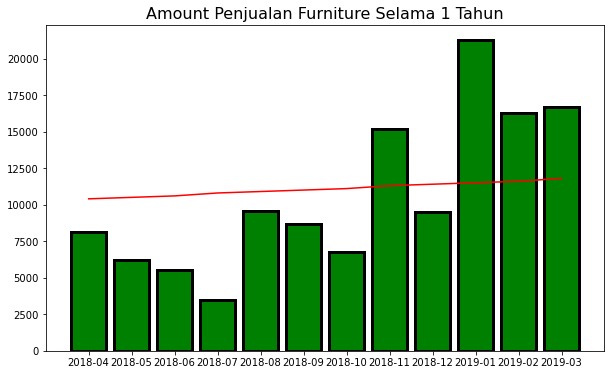

In [27]:
plt.figure(figsize=(10,6))
plt.bar(a, b,
       color='g', 
        edgecolor ='black', 
        linewidth = 3)
plt.plot(a, c, "r")
plt.title("Amount Penjualan Furniture Selama 1 Tahun", size = 16)
plt.show()
# Menampilkan Total Penjualan Furniture yang dilakukan oleh Sales selama periode April 2018 - Maret 2019

In [28]:
b.sum() # Total Penjualan Selama 1 Tahun 127181
d.sum() # Profit sebesar 2298
b.mean() # Rata-rata Amount 10598.4167
c.mean() # Rata-rata Target 11075
# Total Penjualan Furniture Selama 1 Tahun 127181, dengan rata-rata Amount 10598.4167 (dibawah Rata-rata Target 11075) 
# dan mendapatkan Profit sebesar 2298.

11075.0

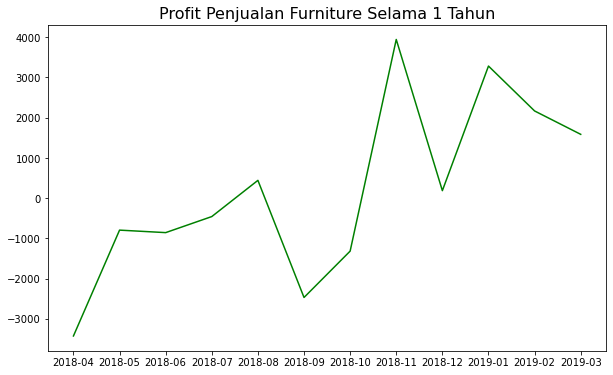

In [29]:
plt.figure(figsize=(10,6))
plt.plot(a, d, "g")
plt.title("Profit Penjualan Furniture Selama 1 Tahun", size = 16)
plt.show()
# Menampilkan Total Profit Penjualan Furniture yang dilakukan oleh Sales selama periode April 2018 - Maret 2019

In [30]:
e = hasil[hasil['Category'] == 'Clothing']['Year Month'].astype(str)
f = hasil[hasil['Category'] == 'Clothing']['Amount']
g = hasil[hasil['Category'] == 'Clothing']['Target']
h = hasil[hasil['Category'] == 'Clothing']['Profit']
# Pengambilan nilai Year Month, Amount, Target, dan Profit pada Category Clothing untuk dijadikan Visualisasi Grafik Bar.

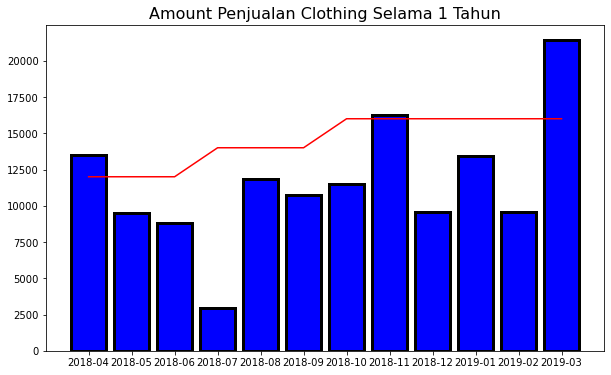

In [31]:
plt.figure(figsize=(10,6))
plt.bar(e, f,
       color='b', 
        edgecolor ='black', 
        linewidth = 3)
plt.plot(e, g, "r")
plt.title("Amount Penjualan Clothing Selama 1 Tahun", size = 16)
plt.show()
# Menampilkan Total Penjualan Clothing yang dilakukan oleh Sales selama periode April 2018 - Maret 2019

In [32]:
f.sum() # Total Penjualan Selama 1 Tahun 139054
h.sum() # Profit sebesar 11163
f.mean() # Rata-rata Amount 11587.8333
g.mean() # Rata-Rata Target 14500
# Total Penjualan Clothing Selama 1 Tahun 139054, dengan rata-rata Amount 11587.83333 (dibawah Rata-rata Target 14500) 
# dan mendapatkan Profit sebesar 11163.

14500.0

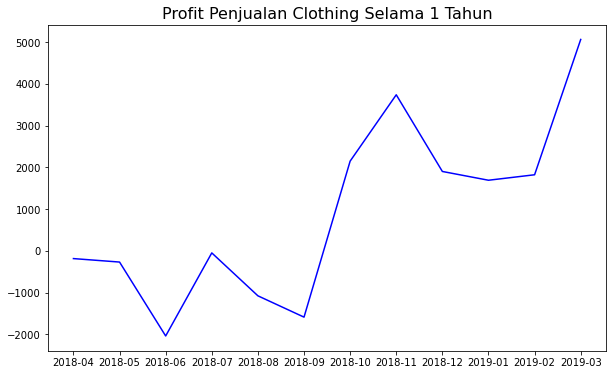

In [33]:
plt.figure(figsize=(10,6))
plt.plot(e, h, "b")
plt.title("Profit Penjualan Clothing Selama 1 Tahun", size = 16)
plt.show()
# Menampilkan Total Profit Penjualan Clothing yang dilakukan oleh Sales selama periode April 2018 - Maret 2019

In [34]:
i = hasil[hasil['Category'] == 'Electronics']['Year Month'].astype(str)
j = hasil[hasil['Category'] == 'Electronics']['Amount']
k = hasil[hasil['Category'] == 'Electronics']['Target']
l = hasil[hasil['Category'] == 'Electronics']['Profit']
# Pengambilan nilai Year Month, Amount, Target, dan Profit pada Category Electronics untuk dijadikan Visualisasi Grafik Bar.

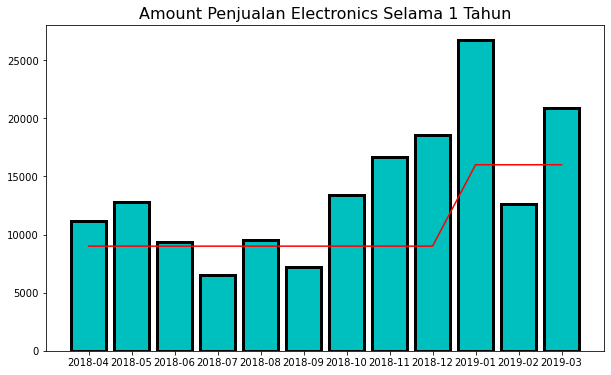

In [35]:
plt.figure(figsize=(10,6))
plt.bar(i, j,
       color='c', 
        edgecolor ='black', 
        linewidth = 3)
plt.plot(i, k, "r")
plt.title("Amount Penjualan Electronics Selama 1 Tahun", size = 16)
plt.show()
# Menampilkan Total Penjualan Electronics yang dilakukan oleh Sales selama periode April 2018 - Maret 2019

In [36]:
j.sum() # Total Penjualan Selama 1 Tahun 165267
l.sum() # Profit sebesar 10494
j.mean() # Rata-rata Amount 13772.25
k.mean() # Rata-rata Target 10750
# Total Penjualan Electronics Selama 1 Tahun 165267 dengan profit 10494
# Total Penjualan Clothing Selama 1 Tahun 165267, dengan Rata-rata Amount 13772.25 (diatas Rata-rata Target 10750) 
# dan mendapatkan Profit sebesar 10494.

10750.0

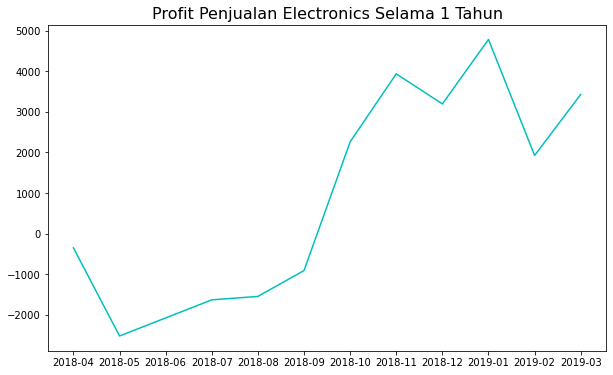

In [37]:
plt.figure(figsize=(10,6))
plt.plot(i, l, "c")
plt.title("Profit Penjualan Electronics Selama 1 Tahun", size = 16)
plt.show()
# Menampilkan Total Profit Penjualan Electronics yang dilakukan oleh Sales selama periode April 2018 - Maret 2019

In [38]:
kurang = hasil[hasil['Target'] > hasil['Amount']]
# Hasil penjualan yang tidak mencapai target
bagus = hasil[hasil['Target'] <= hasil['Amount']]
# Hasil penjualan yang melebihi target
a1 = bagus[bagus['Category'] == "Furniture"]['Profit'].sum()
b1 = bagus[bagus['Category'] == "Clothing"]['Profit'].sum()
c1 = bagus[bagus['Category'] == "Electronics"]['Profit'].sum()
d1 = kurang[kurang['Category'] == "Furniture"]['Profit'].sum()
e1 = kurang[kurang['Category'] == "Clothing"]['Profit'].sum()
f1 = kurang[kurang['Category'] == "Electronics"]['Profit'].sum()
# Proses mengekstraksi Profit yang didapatkan selama setahun

In [39]:
total = a1+b1+c1+d1+e1+f1
total
# Total profit yang didapatkan selama 1 tahun penjualan oleh Sales

23955.0

### Dikarenakan Rata-Rata Amount Penjualan Furniture Selama 1 dibawah Rata-Rata Target, maka perlu dianalisa Berdasarkan Hari dan Kota

In [41]:
furniture = df[df['Category'] == 'Furniture']
furniture
# Mengekstrak dataframe menjadi Category = Furniture

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City,Year Month,Day
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,2018-04-01,Bharat,Gujarat,Ahmedabad,2018-04,Sunday
10,B-25603,24.0,-30.0,1,Furniture,Chairs,2018-04-03,Jahan,Madhya Pradesh,Bhopal,2018-04,Tuesday
22,B-25608,1364.0,-1864.0,5,Furniture,Tables,2018-04-08,Aarushi,Tamil Nadu,Chennai,2018-04,Sunday
23,B-25608,476.0,0.0,3,Furniture,Chairs,2018-04-08,Aarushi,Tamil Nadu,Chennai,2018-04,Sunday
33,B-25610,30.0,-5.0,2,Furniture,Furnishings,2018-04-09,Yogesh,Bihar,Patna,2018-04,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,B-26081,359.0,-338.0,5,Furniture,Bookcases,2019-03-22,Aarushi,Tamil Nadu,Chennai,2019-03,Friday
1467,B-26093,852.0,51.0,5,Furniture,Bookcases,2019-03-27,Sarita,Maharashtra,Pune,2019-03,Wednesday
1484,B-26097,185.0,-26.0,6,Furniture,Chairs,2019-03-28,Vini,Karnataka,Bangalore,2019-03,Thursday
1488,B-26098,497.0,179.0,3,Furniture,Chairs,2019-03-29,Pinky,Jammu and Kashmir,Kashmir,2019-03,Friday


In [42]:
penjualanfurniture = furniture[['Day','Order ID']].groupby('Day', as_index=False).count()
penjualanfurniture['Day'] = penjualanfurniture['Day'].astype(str)
penjualanfurniture
# Melihat Total Transaksi Furniture yang terjadi per Hari Selama 1 Tahun Penjualan

,Day,Order ID
0,Friday,35
1,Monday,33
2,Saturday,31
3,Sunday,47
4,Thursday,43
5,Tuesday,27
6,Wednesday,27


In [43]:
penjualanfurniture.mean()
# Rata-Rata Penjualan Furniture per hari Selama 1 Tahun Penjualan

Order ID    34.714286
dtype: float64

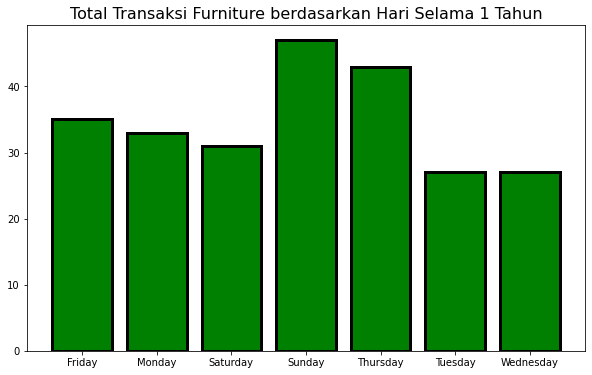

In [44]:
plt.figure(figsize=(10,6))
plt.bar(penjualanfurniture['Day'], penjualanfurniture['Order ID'],
       color='g', 
        edgecolor ='black', 
        linewidth = 3)
plt.title("Total Transaksi Furniture berdasarkan Hari Selama 1 Tahun", size = 16)
plt.show()
# Menampilkan grafik penjualan Furniture berdasarkan Hari Selama 1 Tahun (Yang dibawah Rata-rata pada hari Monday, Saturday, Tuesday & Wednesday)

In [45]:
daerahfurniture = furniture[['City','Order ID']].groupby('City', as_index=False).count()
daerahfurniture
# Melihat Total Transaksi Furniture berdasarkan Order ID yang terjadi di tiap-tiap City

,City,Order ID
0,Ahmedabad,9
1,Allahabad,3
2,Amritsar,1
3,Bangalore,7
4,Bhopal,11
5,Chandigarh,13
6,Chennai,5
7,Delhi,17
8,Gangtok,1
9,Goa,3


In [46]:
daerahfurniture.mean()
# Rata-rata penjualan Furniture yang terjadi di tiap kota selama 1 Tahun Penjualan

Order ID    10.125
dtype: float64

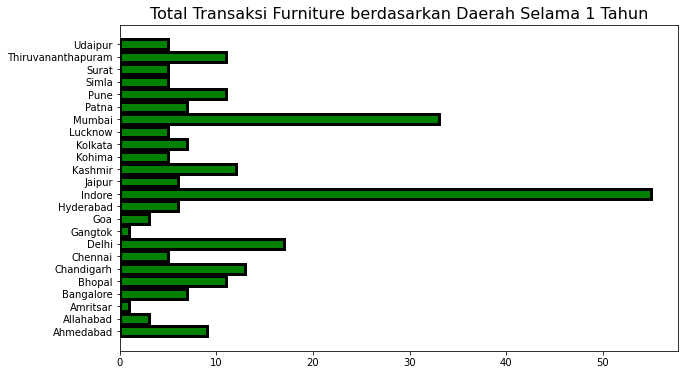

In [47]:
plt.figure(figsize=(10,6))
plt.barh(daerahfurniture['City'], daerahfurniture['Order ID'],
       color='g', 
        edgecolor ='black', 
        linewidth = 3)
plt.title("Total Transaksi Furniture berdasarkan Daerah Selama 1 Tahun", size = 16)
plt.show()
# Menampilkan Grafik penjualan Furniture berdasarkan Daerah selama 1 Tahun

In [107]:
daerahfurniture[daerahfurniture['Order ID'] > 10.125]
# Mengambil nama-nama kota yang diatas rata-rata penjualan yang terjadi di tiap kota selama 1 Tahun Penjualan pada data Furniture

,City,Order ID
4,Bhopal,11
5,Chandigarh,13
7,Delhi,17
11,Indore,55
13,Kashmir,12
17,Mumbai,33
19,Pune,11
22,Thiruvananthapuram,11


In [48]:
daerahfurniture[daerahfurniture['Order ID'] < 10.125]
# Mengambil nama-nama kota yang dibawah rata-rata penjualan yang terjadi di tiap kota selama 1 Tahun Penjualan pada data Furniture

,City,Order ID
0,Ahmedabad,9
1,Allahabad,3
2,Amritsar,1
3,Bangalore,7
6,Chennai,5
8,Gangtok,1
9,Goa,3
10,Hyderabad,6
12,Jaipur,6
14,Kohima,5


### Dikarenakan Rata-Rata Amount Penjualan Clothing Selama 1 dibawah Rata-Rata Target, maka perlu dianalisa Berdasarkan Hari dan Kota

In [49]:
clothing = df[df['Category'] == 'Clothing']
clothing
# Mengekstrak dataframe menjadi Category = Clothing

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City,Year Month,Day
1,B-25601,66.0,-12.0,5,Clothing,Stole,2018-04-01,Bharat,Gujarat,Ahmedabad,2018-04,Sunday
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,2018-04-01,Bharat,Gujarat,Ahmedabad,2018-04,Sunday
7,B-25602,561.0,212.0,3,Clothing,Saree,2018-04-01,Pearl,Maharashtra,Pune,2018-04,Sunday
8,B-25602,119.0,-5.0,8,Clothing,Saree,2018-04-01,Pearl,Maharashtra,Pune,2018-04,Sunday
9,B-25603,1355.0,-60.0,5,Clothing,Trousers,2018-04-03,Jahan,Madhya Pradesh,Bhopal,2018-04,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...
1493,B-26099,9.0,3.0,1,Clothing,Skirt,2019-03-30,Bhishm,Maharashtra,Mumbai,2019-03,Saturday
1494,B-26099,207.0,37.0,4,Clothing,Hankerchief,2019-03-30,Bhishm,Maharashtra,Mumbai,2019-03,Saturday
1496,B-26099,2366.0,552.0,5,Clothing,Trousers,2019-03-30,Bhishm,Maharashtra,Mumbai,2019-03,Saturday
1498,B-26100,34.0,10.0,2,Clothing,T-shirt,2019-03-31,Hitika,Madhya Pradesh,Indore,2019-03,Sunday


In [50]:
penjualanclothing = clothing[['Day','Order ID']].groupby('Day', as_index=False).count()
penjualanclothing['Day'] = penjualanclothing['Day'].astype(str)
penjualanclothing
# Melihat Total Transaksi Clothing yang terjadi per Hari Selama 1 Tahun Penjualan

,Day,Order ID
0,Friday,157
1,Monday,158
2,Saturday,96
3,Sunday,152
4,Thursday,151
5,Tuesday,145
6,Wednesday,90


In [51]:
penjualanclothing.mean()
# Rata-Rata Penjualan Clothing per hari Selama 1 Tahun Penjualan

Order ID    135.571429
dtype: float64

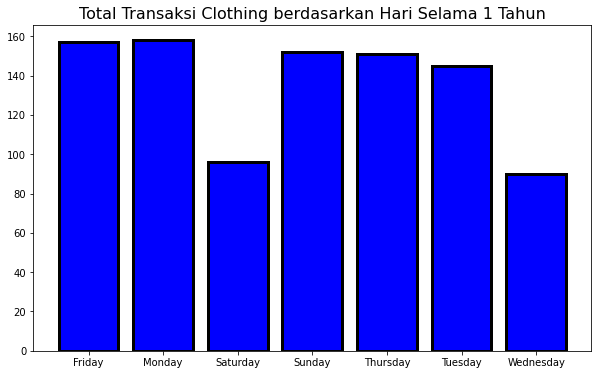

In [52]:
plt.figure(figsize=(10,6))
plt.bar(penjualanclothing['Day'], penjualanclothing['Order ID'],
       color='b', 
        edgecolor ='black', 
        linewidth = 3)
plt.title("Total Transaksi Clothing berdasarkan Hari Selama 1 Tahun", size = 16)
plt.show()
# Menampilkan grafik penjualan Clothing berdasarkan Hari Selama 1 Tahun (Yang dibawah Rata-rata pada hari Saturday & Wednesday)

In [53]:
daerahclothing = clothing[['City','Order ID']].groupby('City', as_index=False).count()
daerahclothing
# Melihat Total Transaksi Clothing berdasarkan Order ID yang terjadi di tiap-tiap City

,City,Order ID
0,Ahmedabad,44
1,Allahabad,22
2,Amritsar,7
3,Bangalore,36
4,Bhopal,41
5,Chandigarh,47
6,Chennai,17
7,Delhi,49
8,Gangtok,17
9,Goa,34


In [54]:
daerahclothing.mean()
# Rata-rata penjualan Clothing yang terjadi di tiap kota selama 1 Tahun Penjualan

Order ID    39.541667
dtype: float64

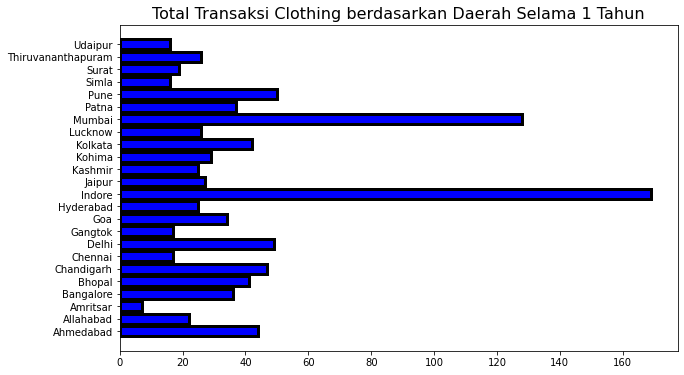

In [55]:
plt.figure(figsize=(10,6))
plt.barh(daerahclothing['City'], daerahclothing['Order ID'],
       color='b', 
        edgecolor ='black', 
        linewidth = 3)
plt.title("Total Transaksi Clothing berdasarkan Daerah Selama 1 Tahun", size = 16)
plt.show()
# Menampilkan Grafik penjualan Clothing berdasarkan Daerah selama 1 Tahun

In [106]:
daerahclothing[daerahclothing['Order ID'] > 39.541667]
# Mengambil nama-nama kota yang diatas rata-rata penjualan yang terjadi di tiap kota selama 1 Tahun Penjualan pada data Clothing

,City,Order ID
0,Ahmedabad,44
4,Bhopal,41
5,Chandigarh,47
7,Delhi,49
11,Indore,169
15,Kolkata,42
17,Mumbai,128
19,Pune,50


In [56]:
daerahclothing[daerahclothing['Order ID'] < 39.541667]
# Mengambil nama-nama kota yang dibawah rata-rata penjualan yang terjadi di tiap kota selama 1 Tahun Penjualan pada data Clothing

,City,Order ID
1,Allahabad,22
2,Amritsar,7
3,Bangalore,36
6,Chennai,17
8,Gangtok,17
9,Goa,34
10,Hyderabad,25
12,Jaipur,27
13,Kashmir,25
14,Kohima,29


### Asumsi

#### 1. Asumsi Penjualan Furniture ditingkatkan pada hari Senin, Selasa, Rabu, dan Sabtu menjadi 35

In [62]:
baru = [35,35,35,47,43,35,35]
fbaru = pd.DataFrame(baru, columns = ['Order Baru'])
furniturebaru = pd.concat([penjualanfurniture, fbaru],axis=1)
furniturebaru
# Mengekstrak dengan Asumsi Penjualan Furniture ditingkatkan pada hari Senin, Selasa, Rabu, dan Sabtu menjadi 35

,Day,Order ID,Order Baru
0,Friday,35,35
1,Monday,33,35
2,Saturday,31,35
3,Sunday,47,47
4,Thursday,43,43
5,Tuesday,27,35
6,Wednesday,27,35


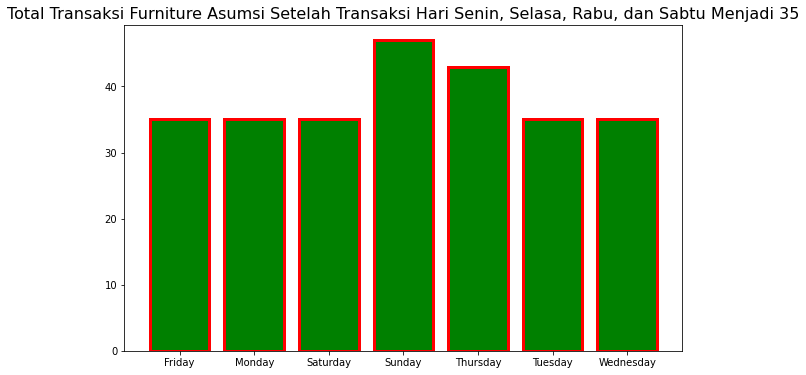

In [73]:
plt.figure(figsize=(10,6))
plt.bar(furniturebaru['Day'], furniturebaru['Order Baru'],
       color='g', 
        edgecolor ='red', 
        linewidth = 3)
plt.title("Total Transaksi Furniture Asumsi Setelah Transaksi Hari Senin, Selasa, Rabu, dan Sabtu Menjadi 35", size = 16)
plt.show()
# Menampilkan grafik penjualan Furniture berdasarkan Hari Selama 1 Tahun Setelah Ditingkatkan Menjadi 35(diatas Rata-Rata)

In [111]:
x1 = furniturebaru['Order ID'].sum()
x2 = furniturebaru['Order Baru'].sum()
b = hasil[hasil['Category'] == 'Furniture']['Amount'].sum() # Total Amount Furniture Selama 1 Tahun
bmean = hasil[hasil['Category'] == 'Furniture']['Amount'].mean() # rata-rata Target
perfurniture = b / x1
perfurniture # Anggapan = Per 1 Transaksi Amountnya 523.3786
nowfurniture = x2 * perfurniture
nowfurniture # Setelah Asumsi Hari Senin, Selasa, Rabu, dan Sabtu ditingkatkan menjadi 35
ratafurniture = nowfurniture/12
ratafurniture # Menjadi 11557.9441 diatas dari rata-rata Target 11075, sehingga ada kenaikan Amount 9.05% untuk mengejar Target.
persenfurniture = ratafurniture/bmean
persenfurniture

1.0905349794238686

#### 2. Asumsi Penjualan Clothing ditingkatkan 30% pada Setiap Hari

In [100]:
baru1 = [157*1.3,158*1.3,96*1.3,152*1.3,151*1.3,145*1.3,90*1.3]
cbaru = pd.DataFrame(baru1, columns = ['Order Baru'])
clothingbaru = pd.concat([penjualanclothing, cbaru],axis=1)
clothingbaru
# Mengekstrak dengan Asumsi Penjualan Clothing ditingkatkan 30% Setiap Hari

,Day,Order ID,Order Baru
0,Friday,157,204.1
1,Monday,158,205.4
2,Saturday,96,124.8
3,Sunday,152,197.6
4,Thursday,151,196.3
5,Tuesday,145,188.5
6,Wednesday,90,117.0


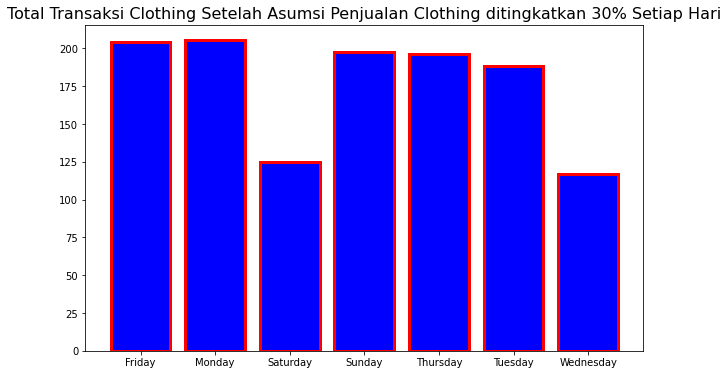

In [104]:
plt.figure(figsize=(10,6))
plt.bar(clothingbaru['Day'], clothingbaru['Order Baru'],
       color='b', 
        edgecolor ='red', 
        linewidth = 3)
plt.title("Total Transaksi Clothing Setelah Asumsi Penjualan Clothing ditingkatkan 30% Setiap Hari", size = 16)
plt.show()
# Menampilkan grafik penjualan Clothing berdasarkan Hari Selama 1 Tahun Setelah Asumsi Penjualan Clothing ditingkatkan 30% Setiap Hari

In [110]:
y1 = clothingbaru['Order ID'].sum()
y2 = clothingbaru['Order Baru'].sum()
f = hasil[hasil['Category'] == 'Clothing']['Amount'].sum() # Total Amount Clothing Selama 1 Tahun
fmean = hasil[hasil['Category'] == 'Clothing']['Amount'].mean() # rata-rata Target
perclothing = f / y1
perclothing # Anggapan = Per 1 Transaksi Amountnya 146.5268
nowclothing = y2 * perclothing
nowclothing # Setelah Asumsi Penjualan Clothing ditingkatkan 30% Setiap Hari
rataclothing = nowclothing/12
rataclothing # Menjadi 15064.1833 diatas dari rata-rata Target 14500, sehingga ada kenaikan Amount 30% untuk mengejar Target.
persenclothing = rataclothing/fmean
persenclothing

1.3

## Insight
- Pencapaian Target Penjualan Furniture pada Sales di Tahun 2018 kurang menunjukkan hal yang positif, namun pada Tahun 2019 mulai trend yang positif dalam sisi Target Penjualan. Secara rata-rata Amount Furniture yang didapat (10598.4167) masih di bawah rata-rata Target yang diharapkan (11075).
- Pencapaian Target Penjualan Clothing pada Sales kurang baik, dari 12 bulan Penjualan Clothing, hanya ada 3 bulan yang mencapai Target Penjualan, yaitu pada bulan April 2018, November 2018, dan Maret 2019. Secara rata-rata Amount Clothing yang didapat (11587.8333) masih di bawah rata-rata Target yang diharapkan (14500).
- Pencapaian Target Penjualan Electronics pada Sales sudah cukup baik, dari 12 bulan Penjualan Electronics, hanya ada 3 bulan yang tidak mencapai Target Penjualan, yaitu pada bulan Juli 2018, September 2018, dan Februari 2019. Secara rata-rata Amount Clothing yang didapat (13772.25) sudah diatas rata-rata Target yang diharapkan (10750).
- Total Profit yang menyumbang nilai tertinggi selama 1 Tahun Penjualan yaitu melalui Penjualan Clothing sebesar 11163, yang kedua melalui Penjualan Electronics sebesar 10494 dan yang paling rendah melalui Penjualan Furniture sebesar 2298 dengan Total Profit 23955.
- Penjualan Furniture yang diatas rata-rata ada pada Hari Kamis, Jumat, dan Minggu.
- Penjualan Furniture teramai (diatas rata-rata total transaksi per kota) ada di Kota Bhopal, Chandigarh, Delhi, Indore, Kashmir, Mumbai, Pure, dan Thiruvananthapuram.
- Penjualan Clothing yang diatas rata-rata ada pada Hari Senin, Selasa, Kamis, Jumat, dan Minggu.
- Penjualan Clothing teramai (diatas rata-rata total transaksi per kota) ada di Kota Ahmedabad, Bhopal, Chandigarh, Delhi, Indore, Kolkata, Mumbai, dan Pune.

## Conclusion & Recommendation
- Penjualan Furniture dan Clothing masih dibawah dari rata-rata Target yang ditentukan, sehingga perlu dilakukan peningkatan pada kedua Category tersebut.
- Peningkatan pada Furniture dapat disarankan untuk meningkatkan Jumlah Transaksi Selama Setahun pada Hari Senin, Selasa, Rabu, dan Sabtu menjadi minimal 35 Transaksi (diatas rata-rata Transaksi) dengan memaksimalkan pada kota-kota yang transaksinya di bawah rata-rata yaitu pada kota Ahmedabad, Allahabad, Amritsar, Bangalore, Chennai, Gangtok, Goa, Hyderabad, Jaipur, Kohima, Kolkata, Lucknow, Patna, Simla, Surat, dan Udaipur. Apabila ini dapat dilakukan maka akan berpotensi meningkatkan kenaikan 9.05% untuk mengejar diatas rata-rata Target.
- Peningkatan pada Clothing dapat disarankan untuk meningkatkan Jumlah Transaksi sebesar 30% pada setiap hari selama setahun agar dapat mengejar diatas rata-rata Target dengan cara memaksimalkan pada kota-kota yang transaksinya di bawah rata-rata yaitu pada kota Allahabad, Amritsar, Bangalore, Chennai, Gantok, Goa, Hyderabad, Jaipur, Kashmir, Kohima, Lucknow, Patna, Simla, Surat, Thiruvananthapuram, dan Udaipur. Apabila dapat ditingkatkan maka akan sangat baik dikarenakan Profit yang didapat melalui Penjualan Category Clothing selama 1 tahun cukup tinggi.
- Untuk memaksimalkan peningkatan Penjualan di tiap-tiap kota yang dibawah rata-rata yaitu dengan memberikan Promo pada daerah tersebut, agar para Customers dapat tertarik untuk membeli.
- Untuk beberapa kota-kota yang penjualannya masih dibawah rata-rata dilakukan Survey ketertarikan Customers dengan produk E-Commerce India, dengan begini bisa mengetahui apa saja kekurangan dan kelebihan yang dimiliki oleh E-Commerce India, dan dapat dikembangkan kembali pada bagian yang dirasa kurang oleh Customers.